Let's start by getting some data - monthly surface temp from the ACCESS 1.0 historical CMIP5 experiment

In [1]:
import xarray
url = 'http://dapds00.nci.org.au/thredds/dodsC/ua6/authoritative/CMIP5/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/ts/ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc'
data = xarray.open_dataset(url)
ts = data['ts']

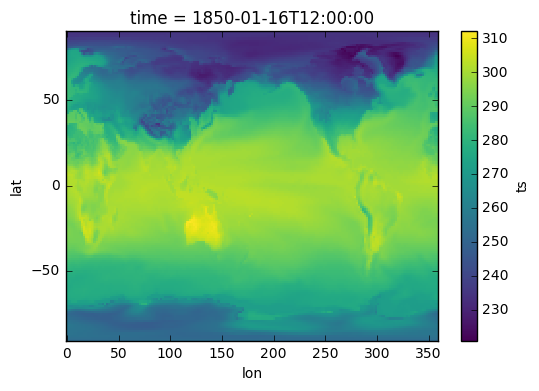

In [2]:
# Does the data look reasonable?

%matplotlib inline
ts[0,:,:].plot()

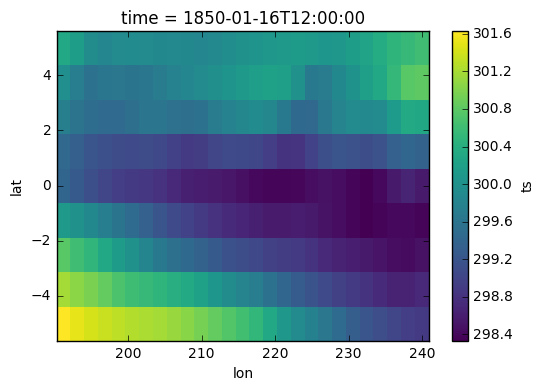

In [3]:
# Select the NINO34 area

nino34_area = ts.sel(lat=slice(-5,5), lon=slice(360-170,360-120))
nino34_area[0].plot()

In [4]:
# Get the baseline over 1961 to 1990

baseline = nino34_area.sel(time=slice('1961','1990'))
baseline

<xarray.DataArray 'ts' (time: 360, lat: 9, lon: 27)>
array([[[ 301.89883423,  301.82598877,  301.76730347, ...,  299.52542114,
          299.47814941,  299.45742798],
        [ 301.54812622,  301.41586304,  301.28500366, ...,  299.38867188,
          299.32928467,  299.29748535],
        [ 301.14730835,  301.02926636,  300.91763306, ...,  299.18936157,
          299.0897522 ,  299.01953125],
        ..., 
        [ 300.41467285,  300.32171631,  300.24734497, ...,  300.50143433,
          300.465271  ,  300.47335815],
        [ 300.59539795,  300.55001831,  300.47769165, ...,  300.8604126 ,
          300.86325073,  300.8855896 ],
        [ 300.79034424,  300.69381714,  300.56491089, ...,  300.56552124,
          300.5713501 ,  300.56658936]],

       [[ 301.93411255,  301.89706421,  301.85314941, ...,  300.19863892,
          300.19790649,  300.21759033],
        [ 300.99191284,  301.00079346,  301.04483032, ...,  300.08618164,
          300.07452393,  300.10888672],
        [ 300.52874

In [5]:
# Group the data by month & get time average

baseline_average = baseline.groupby('time.month').mean(dim='time')
baseline_average

<xarray.DataArray 'ts' (month: 12, lat: 9, lon: 27)>
array([[[ 301.61225586,  301.51633199,  301.43409729, ...,  298.6204539 ,
          298.51098226,  298.41416931],
        [ 301.22447306,  301.10548706,  301.00138652, ...,  298.23286438,
          298.15629272,  298.09739278],
        [ 300.8781189 ,  300.72832947,  300.59751282, ...,  297.93456828,
          297.86680501,  297.81547241],
        ..., 
        [ 299.882783  ,  299.80839945,  299.74776815, ...,  299.29159546,
          299.23413391,  299.2155304 ],
        [ 300.13115946,  300.05815837,  299.98660482, ...,  300.02262675,
          300.05820312,  300.05269775],
        [ 300.53111267,  300.4646637 ,  300.40356445, ...,  300.34836121,
          300.44518636,  300.50100505]],

       [[ 301.39291178,  301.33806559,  301.273526  , ...,  299.31440125,
          299.28821309,  299.29488017],
        [ 300.73117065,  300.63499959,  300.54246724, ...,  299.10487569,
          299.09795939,  299.11271362],
        [ 300.19749

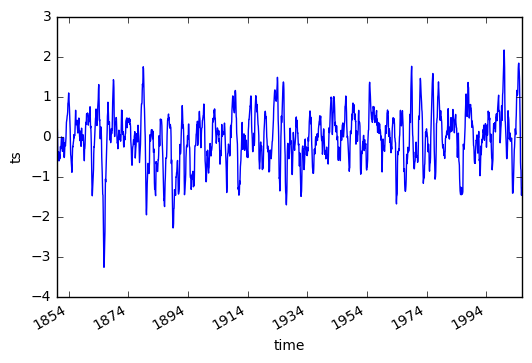

In [6]:
# Get the anomaly and area average

anomaly = nino34_area.groupby('time.month') - baseline_average
nino34_index = anomaly.mean(dim=('lat','lon'))
nino34_index.plot()

In [7]:
nino34_index

<xarray.DataArray 'ts' (time: 1872)>
array([ 0.20011188,  0.26148028,  0.08772272, ..., -1.46529947,
       -1.3121927 , -1.28158876])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ...
    month    (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...

In [8]:
# To save to disk we need to create a dataset

nino34_dataset = xarray.Dataset({'nino34': nino34_index})
nino34_dataset

<xarray.Dataset>
Dimensions:  (time: 1872)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ...
    month    (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...
Data variables:
    nino34   (time) float64 0.2001 0.2615 0.08772 -0.4015 -0.5414 -0.492 ...

In [9]:
# We can copy metadata from the source dataset

nino34_dataset.attrs = data.attrs

from datetime import datetime
notebook = 'https://github.com/ScottWales/swc-climatedata/blob/gh-pages/data/02-xarray-basics.ipynb'
nino34_dataset.attrs['history'] = "{}: nino34 calculated by {}".format(datetime.now(), notebook)

nino34_dataset

<xarray.Dataset>
Dimensions:  (time: 1872)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ...
    month    (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...
Data variables:
    nino34   (time) float64 0.2001 0.2615 0.08772 -0.4015 -0.5414 -0.492 ...
Attributes:
    institution: CSIRO (Commonwealth Scientific and Industrial Research Organisation, Australia), and BOM (Bureau of Meteorology, Australia)
    institute_id: CSIRO-BOM
    experiment_id: historical
    source: ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1.875 degrees EW x approx 1.25 degree NS, 38 levels); ocean: NOAA/GFDL MOM4p1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S, 50 levels); sea ice: CICE4.1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S); land: MOSE

In [10]:
# Save with `to_netcdf()`

nino34_dataset.to_netcdf('nino34.nc')

In [13]:
! ncdump -h nino34.nc

netcdf nino34 {
dimensions:
	time = 1872 ;
variables:
	double time(time) ;
		string time:bounds = "time_bnds" ;
		string time:axis = "T" ;
		string time:long_name = "time" ;
		string time:standard_name = "time" ;
		string time:units = "days since 2001-01-01" ;
		string time:calendar = "proleptic_gregorian" ;
	int month(time) ;
	double nino34(time) ;
		string nino34:coordinates = "month" ;

// global attributes:
		string :institution = "CSIRO (Commonwealth Scientific and Industrial Research Organisation, Australia), and BOM (Bureau of Meteorology, Australia)" ;
		string :institute_id = "CSIRO-BOM" ;
		string :experiment_id = "historical" ;
		string :source = "ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1.875 degrees EW x approx 1.25 degree NS, 38 levels); ocean: NOAA/GFDL MOM4p1 (nominal 1.0 degree EW x 1.0 degrees NS, tripolar north of 65N, equatorial refinement to 1/3 degree from 10S to 10 N, cosine dependent NS south of 25S, 50 levels); sea ice: CICE4.1 (nominal 1.0 degree